In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("insurance.csv")
print (df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# CHECK WHAT IS THE DATA ABOUT
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


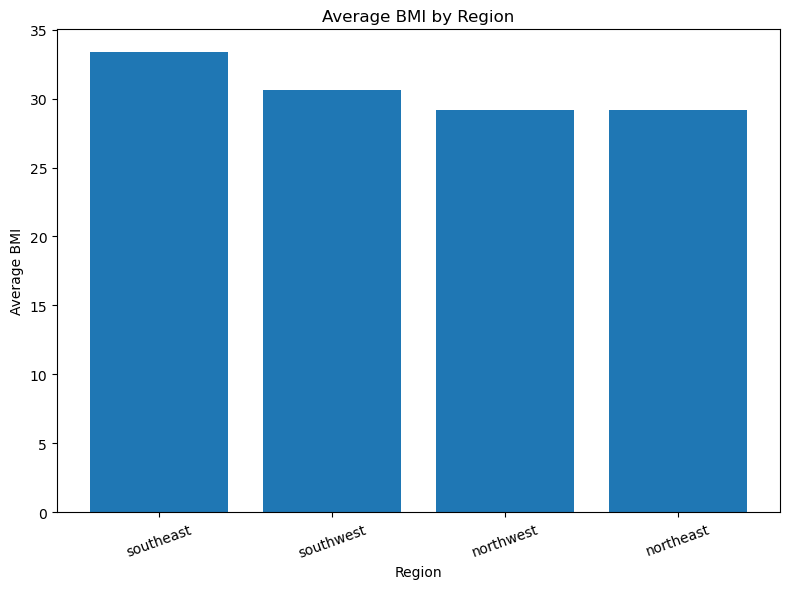

In [6]:
#Calculate average BMI per Region
avg_bmi_by_region = df.groupby('region')['bmi'].mean().sort_values(ascending=False)

#plot it on a bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_bmi_by_region.index, avg_bmi_by_region.values)
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Let's create a linear regression model to predict insurance charges based on BMI, which is a common health indicator that might affect insurance costs.

In [7]:
from sklearn.model_selection import train_test_split
#define x - BMI, y - charges
X = df[['bmi']]
y = df['charges']

<Axes: xlabel='bmi', ylabel='charges'>

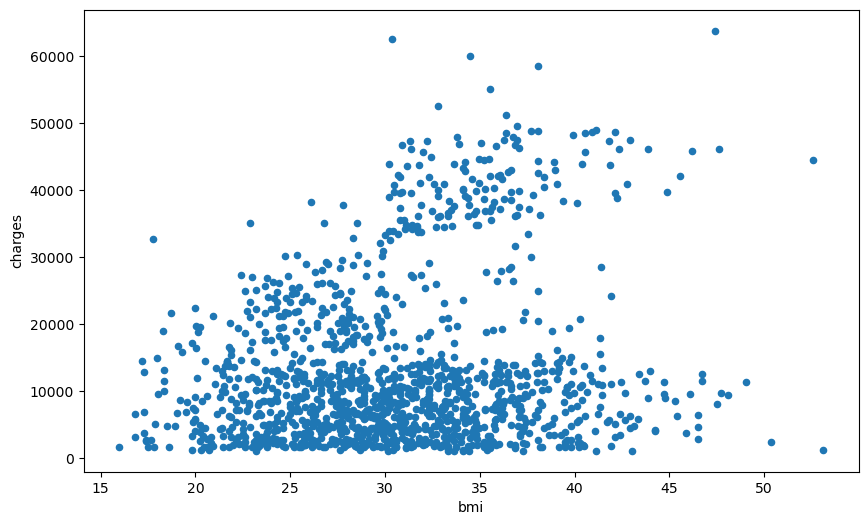

In [29]:
# Plot the data to see if there is any patter possible in our data set
df.plot(kind='scatter', x='bmi', y='charges', figsize=(10, 6))

In [14]:
#test train split of data (model create on train data, and check how it works on testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Test train split')

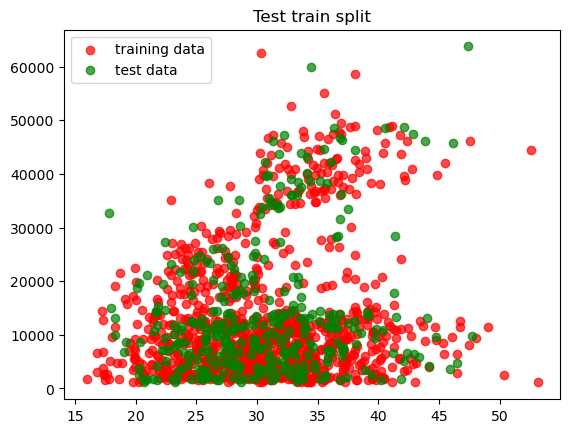

In [13]:
#test / train data split visual
plt.scatter(X_train, y_train, color='r', alpha=.7, label = 'training data')
plt.scatter(X_test, y_test, color='g', alpha=.7, label = 'test data')
plt.legend()
plt.title("Test train split")

#red below will be used to create linear model and will be tested on everything in green

In [15]:
#model creation
model = LinearRegression()
#plug in x train and y train
model.fit(X_train, y_train)
#use model to predict on Test data
y_pred = model.predict(X_test)

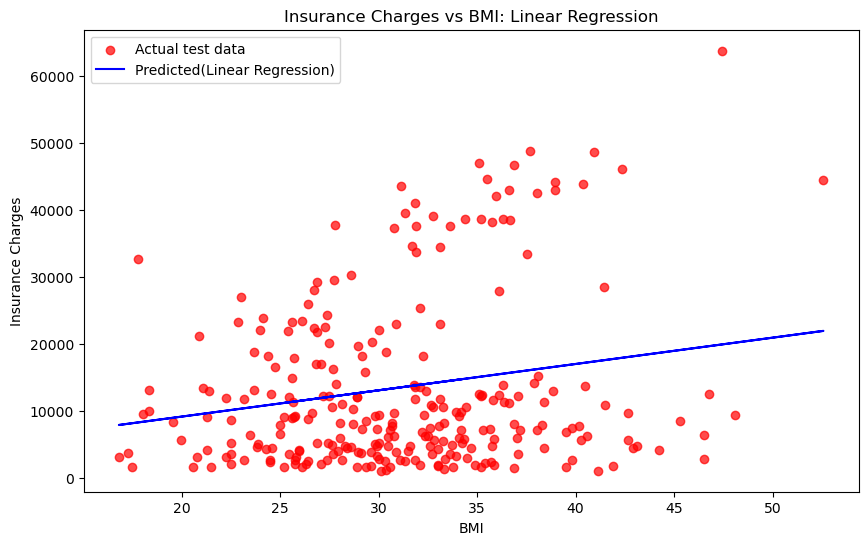

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Actual test data')
plt.plot(X_test, y_pred, color='b', label='Predicted(Linear Regression)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges vs BMI: Linear Regression')
plt.legend()
plt.show()

R² Score shows how well the model fits the data (1.0 is perfect fit, 0.0 is poor fit)

In [19]:
#score the model
model.score(X_test, y_test)

0.03970193117941878

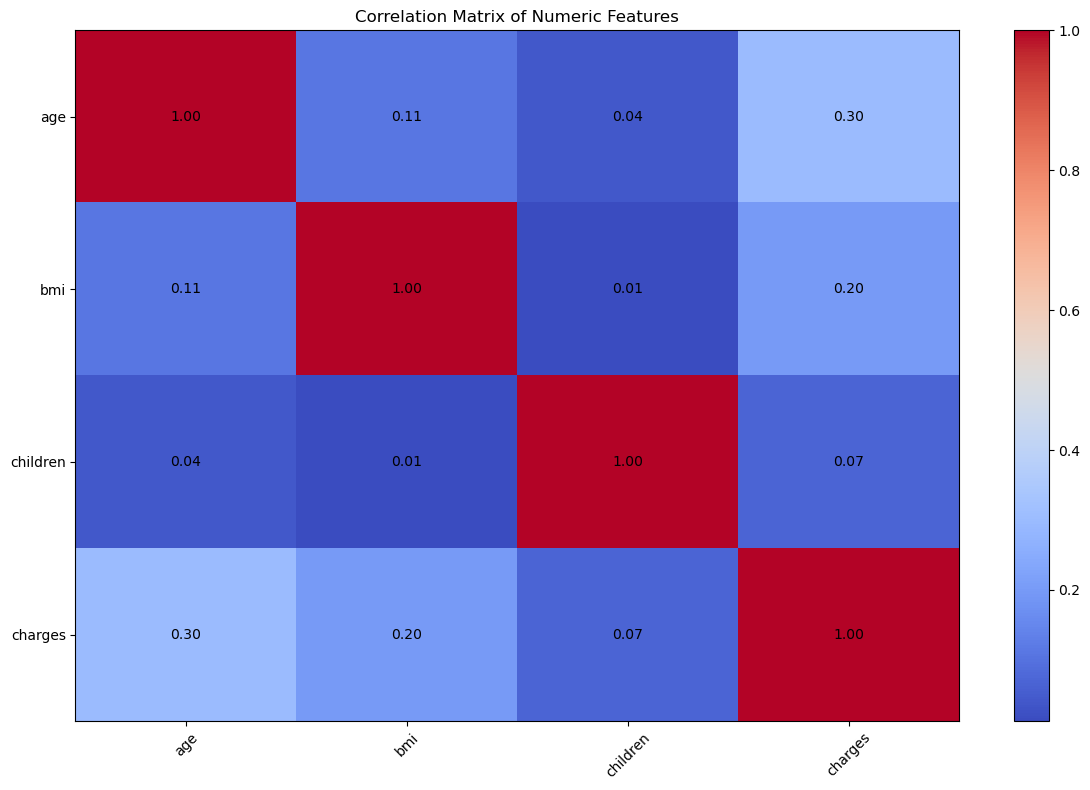

In [20]:
# Let's add detailed feature correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Numeric Features')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import r2_score
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

R² Score: 0.040


In [28]:
# Convert categorical variables to numeric: Feature creation
df_model = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
X = df_model.drop('charges', axis=1)
y = df_model['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R² Score with all features: {r2_score(y_test, y_pred):.3f}")

R² Score with all features: 0.784


In [25]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
             Feature   Coefficient
6         smoker_yes  11825.564428
5          smoker_no -11825.564428
7   region_northeast    459.585244
2           children    425.278784
10  region_southwest   -350.214110
1                bmi    337.092552
0                age    256.975706
9   region_southeast   -198.279052
8   region_northwest     88.907918
4           sex_male     -9.295846
3         sex_female      9.295846


The scatter plot visualizes how well our improved linear regression model performs by comparing actual vs predicted insurance charges. Here's a detailed explanation of the code components:

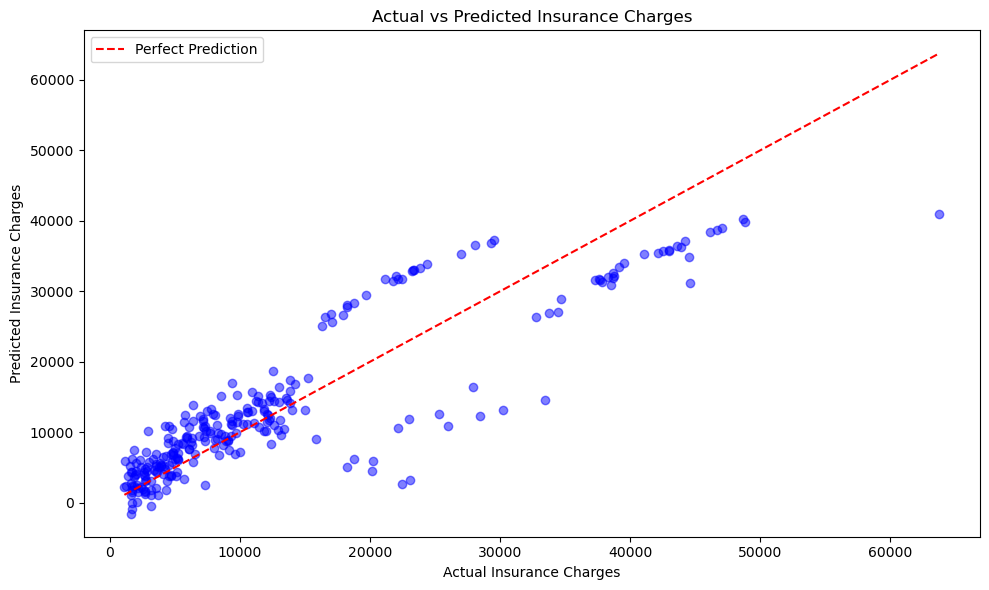

In [27]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Create scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs Predicted Insurance Charges')

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In this visualization:
- Points closer to the red dashed line indicate better predictions
- The red dashed line represents where actual = predicted (perfect predictions)
- Points above the line indicate overestimation
- Points below the line indicate underestimation
- The spread of points around the line shows the model's accuracy - tighter spread means better predictions
